In [31]:
import pandas as pd
import requests
import json
from datetime import date
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [3]:
url = 'https://www.medscape.com/viewarticle/927976#vp_1'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [5]:
ps = soup.find_all('p')

In [28]:
ps[7].text.split('\n')[1].split('age unknown, ')[1].replace('Tehran, ','').replace('Iran','')

'Emergency Medicine Specialist, '

In [52]:
ps[4].text.split(',')

['\n\nUpdated on April 6',
 ' 2020\n // As front-line healthcare workers care for patients with COVID-19',
 ' they commit themselves to difficult',
 ' draining work and also put themselves at risk of infection. Hundreds throughout the world have died. Medscape wants to make sure they are not forgotten',
 ' and we will update this list as — sadly — needed.']

In [6]:
states = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

In [19]:
this = '54'
this.isnumeric()

True

In [27]:
dict_list =[]
for paragraph in ps[6:-10]:
    name = 'None'
    age = 'None'
    specialty = 'None'
    city = 'None'
    state = 'None'
    country = 'None'
    location = 'None'
    try:
        info_text = paragraph.text.replace('\n','').replace('\xa0','')
        info_list = info_text.split(', ')
        info_update =[]
        for info in info_list:
            info_update += (info.split(','))
        info_list = info_update
        name = info_list[0]
        if len(info_list)==4:
            age = info_list[1]
            specialty = info_list[2]
            city = info_list[3]
        else:
            for info in info_list:
                if info.isnumeric() or info=='age unknown':
                    age = info
                if info in states:
                    state = info
                    country = 'USA'
                    city = info_list[-2]
            if country!= 'USA':
                country = info_list[-1]
                city = info_list[-2]
            if age!= 'None':
                remainder = info_text.split(f'{age},')[1]
                remainder = remainder.replace(f'{city}, ', '').replace(state, '').replace(country, '')
                if remainder[0]==' ':
                    remainder = remainder[1:]
                specialty = remainder.replace(', ',' ')
                remainder_list = remainder.split(', ')
                if len(remainder_list)>2:
                    location = remainder_list[-2]
                    specialty = remainder.replace(location,'').replace(', ',' ')
        specialty = specialty.replace('  ','')
        if specialty[-1]==' ':
            specialty = specialty[:-1]
        if country == 'New York City':
            country = 'USA'
            city = 'New York City'
            state = 'New York'
        if city == 'Washington':
            state = 'DC'
            specialty = specialty.replace(',DC','')
        if city == 'age unknown':
            city = 'None'
    except IndexError as e:
        print('Human intervention needed for the following exception:')
        print(e)
        print(paragraph.text)        
    new_dict = {
        'NAME': name,
        'AGE': age,
        'SPECIALTY': specialty,
        'CITY': city,
        'STATE': state,
        'COUNTRY': country,
        'LOCATION': location
    }
    dict_list.append(new_dict)

Human intervention needed for the following exception:
string index out of range

Gennaro Annarumma, age unknown, Italy
Human intervention needed for the following exception:
string index out of range

Alberto Paolini, age unknown, Italy


In [12]:
info_text

'Gennaro Annarumma, age unknown, Italy'

In [95]:
ps[-10]

<p>
<a href="https://www.recordgazette.net/news/breaking/county-health-officials-announce-death-of-year-old-exposed-to/article_7d248fca-706b-11ea-9834-73620c16ce2f.html">Anonymous Pharmacy Technician</a>, 25, San Diego County, California</p>

In [62]:
remainder

[' General Practitioner', '']

In [65]:
age

'None'

In [11]:
info_text

'Gennaro Annarumma, age unknown, Italy'

In [71]:
age

'None'

In [16]:
all_df = pd.DataFrame(dict_list)

In [98]:
len(['Ashraf Abdo', '60', 'General Practitioner', 'New York City'])

4

In [104]:
' Founder, Professor of Internal Medicine and Rheumatology, Escuela de Medicina Luis Razetti, Hospital Universitario de Caracas, '.split(', ')

[' Founder',
 'Professor of Internal Medicine and Rheumatology',
 'Escuela de Medicina Luis Razetti',
 'Hospital Universitario de Caracas',
 '']

In [124]:
word = 'Victoria'
word[:-1]

'Victori'

In [18]:
all_df.to_csv('../../../Data/Medscape/Memorium.csv', index=False)

In [4]:
soup.text

'\n\n\n\n\n\t\tvar isFPFEligible = null;\n\t\tvar isFPFReferer = false;\n\n    \nIn Memoriam: Healthcare Workers Who Have Died of COVID-19\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nvar s_responsive_design = true;\n\n\n\n\n\n\ndocument.cookie = \'usrctry=\' + String("US").toLowerCase() +\'; path=/; domain=\' + document.domain.match(/medscape\\.[^.\\/]+/)[0] + \'; expires=Thu, 13 Aug 2048 16:01:51 GMT\';\n\n\n\n            (function(w,d,s,m,n,t){\n            w[m]=w[m]||{init:function(){(w[m].q=w[m].q||[]).push(arguments);},ready:function(c){if(\'function\'!=typeof c){return;}n.onload=n.onreadystatechange=function(){\n            if(!n.readyState||/loaded|complete/.test(n.readyState)){n.onload=n.onreadystatechange=null;if(t.parentNode&&n.parentNode){t.parentNode.removeChild(n);}if(c){c();}}};}},\n            w[m].d=1*new Date();n=d.createElement(s);t=d.getElementsByTagName(s)[0];n.async=1;n.src=\'//www.medtargetsystem.com/javascript/beacon.js?v2.5.12\';\n            

In [19]:
all_df[all_df.COUNTRY=='USA'].to_csv('../../../Data/Medscape/Memorium_USA.csv', index=False)

In [24]:
from datetime import datetime

# datetime object containing current date and time
now = datetime.now()

In [26]:
str(now).split('.')[0].replace(' ','_')

'2020-04-07 12:47:58.524958'

In [38]:
list(all_df.groupby('COUNTRY').count()['NAME'])

[3,
 1,
 3,
 1,
 10,
 1,
 9,
 3,
 1,
 3,
 76,
 67,
 3,
 1,
 1,
 18,
 2,
 1,
 16,
 1,
 2,
 1,
 10,
 3,
 1,
 1,
 38,
 1]

In [43]:
by_country = by_country.sort_values(ascending = False)

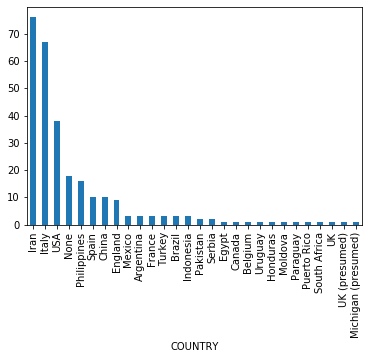

In [44]:
ax = by_country.plot.bar()

In [46]:
us = all_df[all_df.COUNTRY == 'USA']


In [47]:
by_state = us.groupby('STATE').count()['NAME']

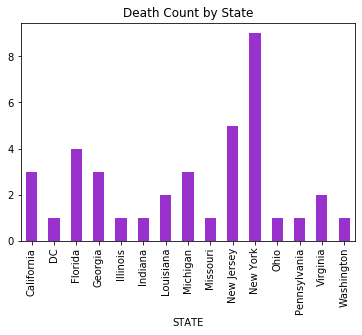

In [71]:
by_state.sort_values(ascending=False)
ay = by_state.plot.bar(title = 'Death Count by State', color = 'darkorchid')

In [ ]:
NURSE
TECHNICIAN
OTHER
PHYSICIAN
ADMINASTRATOR
PHYSICIAN ASSISTANT

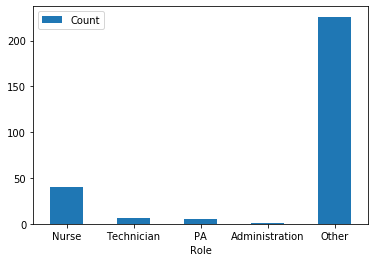

In [56]:
nurse =0
tech =0
assistant=0
admin = 0 
other = 0
phys = 0
for row in all_df.itertuples():
    if 'Nurse' in row.SPECIALTY:
        nurse += 1
    elif 'Tech' in row.SPECIALTY:
        tech += 1
    elif 'Assistant' in row.SPECIALTY:
        assistant += 1
    elif 'Admin' in row.SPECIALTY:
        admin += 1
    elif row.ME != None:
        phys += 1
    else:
        other += 1
df = pd.DataFrame({'Role':['Physician','Nurse', 'Technician','PA','Administration', 'Other'], 'Count':[phys, nurse, tech, assistant, admin, other]})
ax = df.plot.bar(x='Role', y='Count', rot=0)

In [55]:
list(all_df['SPECIALTY'])

['Founder Professor of Internal Medicine and Rheumatology Escuela de Medicina Luis Razetti',
 'Emergency Medicine Specialist',
 'Infectious Disease Specialist',
 'General Practitioner',
 'Epidemiologist',
 'Registered Nurse,',
 'Physician',
 'Nurse',
 'General Practitioner',
 'Nursing Assistant',
 'Physician Novaliches District Hospital,',
 'Medical Director Responsible UOS Hygiene Public Health of the Department of Hygiene and Health Prevention',
 'Psychiatrist',
 'Pharmacist',
 'Nurse',
 '',
 'Hospital Staff',
 'Nursing Staff',
 'General Practitioner',
 'Physician Assistant Emergency Medicine',
 'Ophthalmologist',
 'Nurse',
 'General Practitioner',
 'Cardiologist,Philippine Heart Center',
 'Dentist',
 'General Practitioner,',
 'General Practitioner',
 'Resident Nurse',
 'Physician',
 'Surgical Technician',
 'General Practitioner',
 'Obstetrician',
 'Food and Nutrition Services',
 'Neonatologist and Pediatrician',
 'Physician',
 'Paramedic,',
 'OB-GYN',
 'Hospitalist',
 'Specialist in